In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('../Datasets/diabetes-clean.csv', index_col=0)

df.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.corr()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
blood_pressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin_thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
diabetes_pedigree_function,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


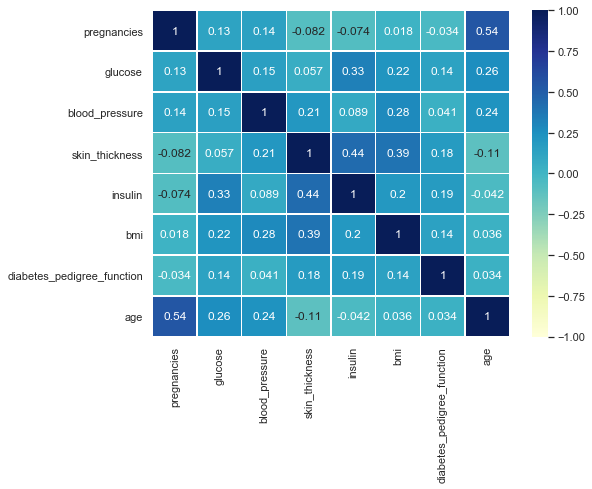

In [4]:
plt.figure(figsize=(8, 6))
ax = sns.heatmap(df.drop(columns=['outcome']).corr(), vmin=-1, vmax=1, annot=True, cmap="YlGnBu", linewidths=.5);

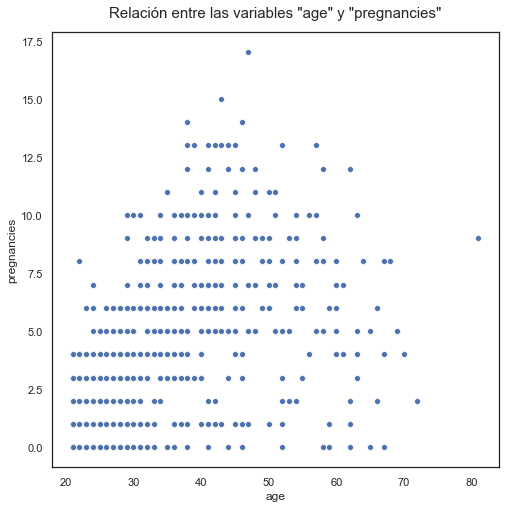

In [5]:
plt.figure(figsize=(8, 8))
sns.set_style('white')
ax = sns.scatterplot(df['age'], df['pregnancies'], palette="Set2");
ax.set_title('Relación entre las variables "age" y "pregnancies"', fontsize=15, pad=15);

In [6]:
sick = df[df['outcome'] == 1]
healthy = df[df['outcome'] == 0]

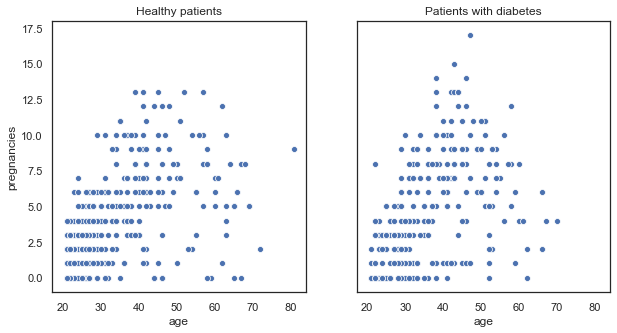

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True, sharex=True)

sns.scatterplot(healthy['age'], healthy['pregnancies'], ax=axes[0])
sns.scatterplot(sick['age'], sick['pregnancies'], ax=axes[1])

axes[0].set_title('Healthy patients')
axes[1].set_title('Patients with diabetes');

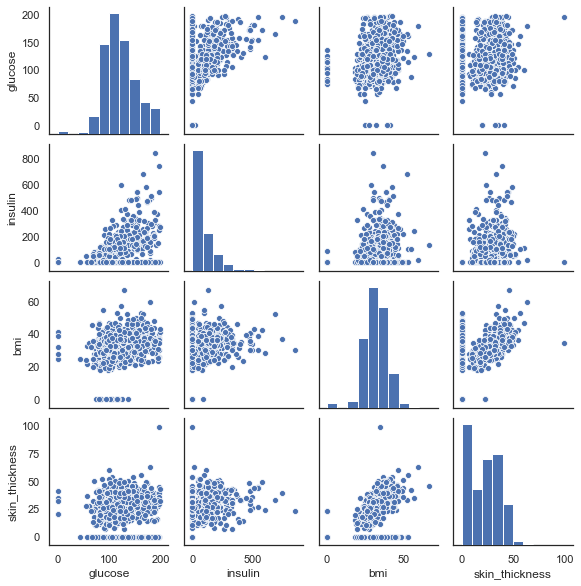

In [8]:
# plt.figure(figsize=(10, 10))
sns.pairplot(df[['glucose', 'insulin', 'bmi', 'skin_thickness']], height=2);

In [9]:
rs = np.random.RandomState(11)
x = rs.gamma(2, size=5000)
y = -.5 * x + rs.normal(size=5000)

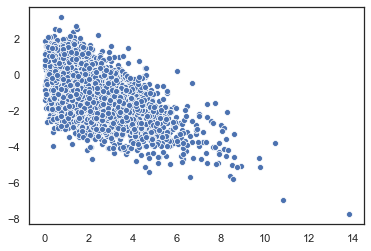

In [10]:
sns.scatterplot(x, y);

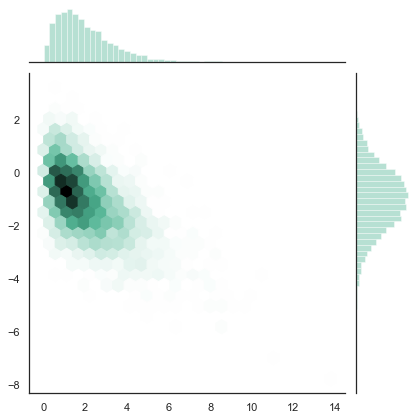

In [11]:
joint_kws=dict(gridsize=25)
sns.jointplot(x, y, kind="hex", color="#4CB391", joint_kws= joint_kws);

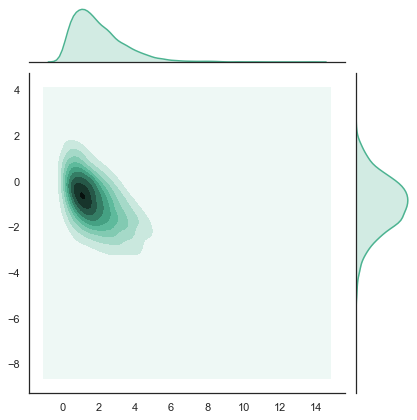

In [12]:
sns.jointplot(x, y, kind="kde", color="#4CB391");

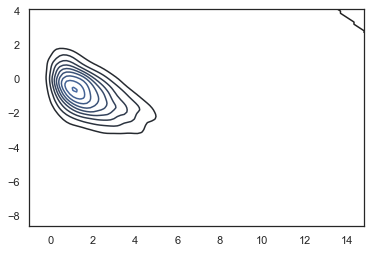

In [13]:
sns.kdeplot(x, y)

In [14]:
from sklearn.linear_model import LinearRegression

In [34]:
serie_1 = pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])
serie_2 = pd.Series([2, 1, 7.8, 3, 19, 10, 14.7, 18, 19.3, 24.5, 20.5, 21, 23.8, 34.4, 18, 48.3, 32.7, 34, 41, 30.3, 20, 32, 48, 29, 45, 53, 63, 43, 54, 48])

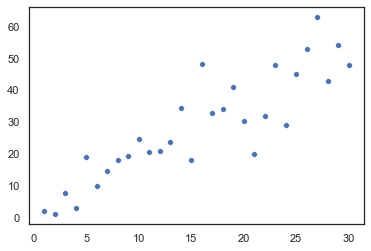

In [35]:
sns.scatterplot(serie_1, serie_2);

In [36]:
serie_1.corr(serie_2)

0.8849529343548095

In [37]:
arr_1 = serie_1.to_numpy().reshape(-1, 1)

In [38]:
lr = LinearRegression().fit(arr_1, serie_2)

In [40]:
lr.score(arr_1, serie_2)

0.7831416960231877

In [41]:
np.power(0.8849529343548095, 2)

0.7831416960231877

In [42]:
y_predict = lr.predict(arr_1)

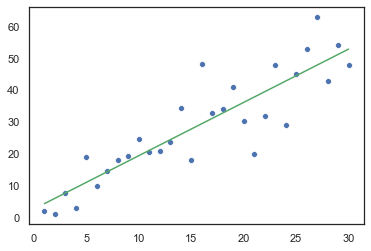

In [46]:
sns.scatterplot(serie_1, serie_2);
sns.lineplot(serie_1, y_predict, color='g');